Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2021/2022  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2021 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **24. listopada 2021. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od četiri zadatka, te tri dodatna zadatka koji se **ne boduju**. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

C:\Users\Ivan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Ivan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Ivan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures

# Vaš kôd ovdje
pf = PolynomialFeatures(degree=1)
X_ = pf.fit_transform(X)
print(X_)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg
# Vaš kôd ovdje

design_matrix = X_.T.dot(X_)
pseudoinv = linalg.inv(design_matrix).dot(X_.T)
W1 = pseudoinv.dot(y)

W2 = linalg.pinv(X_).dot(y)

print(W1)
print(W2)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

2.042857142857143


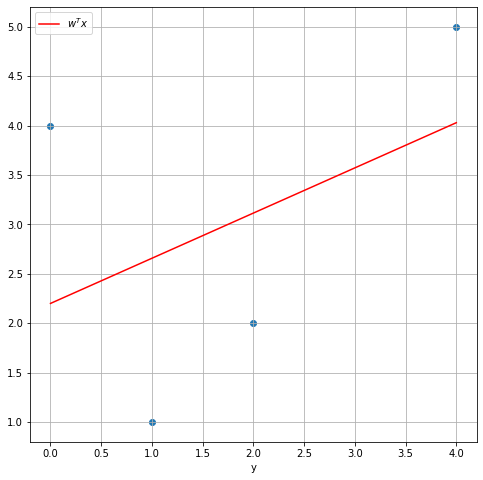

In [5]:
from sklearn.metrics import mean_squared_error
# Vaš kôd ovdje

w = W1.reshape(-1, 1)
y = y.reshape(1, -1)

h = lambda x: w.T.dot(x)
mse = mean_squared_error(h(X_.T), y)

x_values = np.linspace(0, 4, 100).reshape(-1, 1)
y_values = h(pf.transform(x_values).T).T

plt.figure(figsize=(8, 8))
plt.scatter(X.T[0], y)
plt.plot(x_values, y_values, color='red', label='$w^T x$')
plt.grid()
plt.xlabel('x')
plt.xlabel('y')
plt.legend()

print(mse)

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [6]:
# Vaš kôd ovdje
 
y = y.T

try:
    w = linalg.inv(X).dot(y)
    print(w)
except:
    print('ne može se izračunati')
   
X2 = PolynomialFeatures(degree=3).fit_transform(X)
w = linalg.inv(X2).dot(y)
print(w)

ne može se izračunati
[[ 4.        ]
 [-5.91666667]
 [ 3.375     ]
 [-0.45833333]]


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje

lr = LinearRegression()
lr.fit(X, y)

print(f'coef_: ', lr.coef_, '\nintercept_: ', lr.intercept_)

coef_:  [[0.45714286]] 
intercept_:  [2.2]


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [8]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    # Vaš kod ovdje
    return f(X) + np.random.normal(scale=noise, size=(X.shape[0], 1))

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [10]:
# Vaš kôd ovdje
f = lambda x: 5 + x - 2*x**2 - 5*x**3

X = make_instances(-5, 5, 50)
y = make_labels(X, f=f, noise=200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

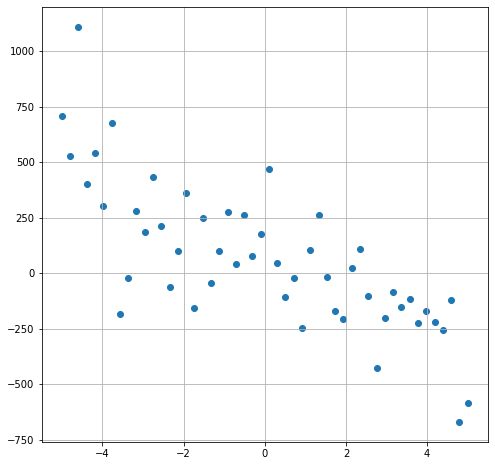

In [11]:
# Vaš kôd ovdje

plt.figure(figsize=(8, 8))
plt.scatter(X, y)
plt.grid();

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

37774.00547505252


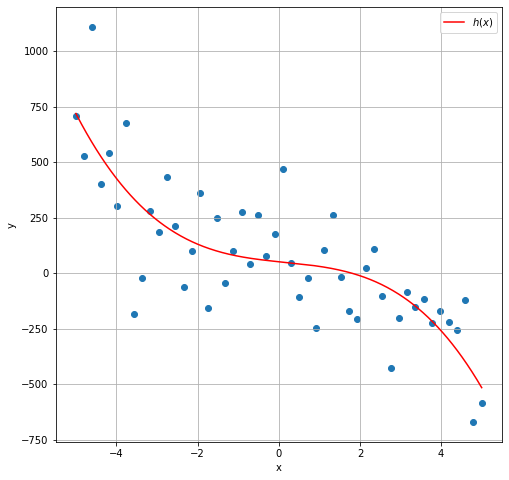

In [12]:
# Vaš kôd ovdje
poly_reg = PolynomialFeatures(degree=3)
X_ = poly_reg.fit_transform(X)
lr = LinearRegression()
lr.fit(X_, y)

x_values = np.linspace(-5, 5, 500).reshape(-1, 1)
y_values = lr.predict(poly_reg.transform(x_values))

plt.figure(figsize=(8, 8))

plt.scatter(X, y)
plt.plot(
    x_values, 
    y_values, 
    color='r',
    label='$h(x)$'
)

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid();

print(mean_squared_error(lr.predict(X_), y))

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

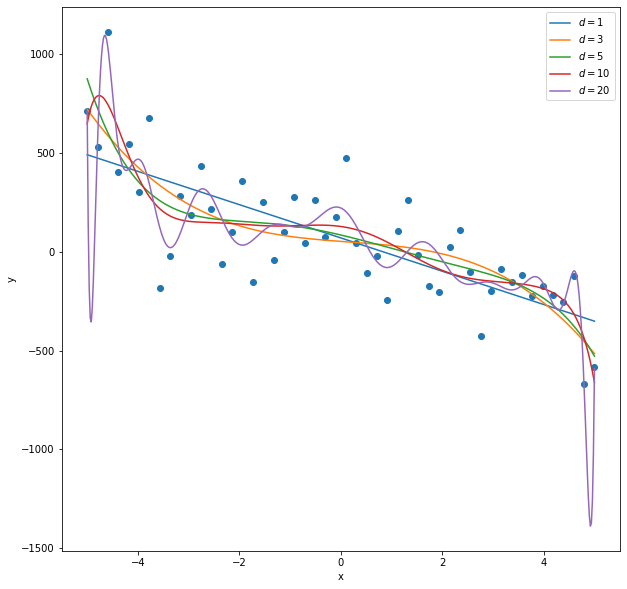

d: 1, error: 45049.3459204657
d: 3, error: 37774.00547505252
d: 5, error: 35793.966447328516
d: 10, error: 32497.90192475147
d: 20, error: 22695.426775270087


In [13]:
# Vaš kôd ovdje

x_values = np.linspace(-5, 5, 500).reshape(-1, 1)
plt.figure(figsize=(10, 10))

X_ = X[:]

d = [1, 3, 5, 10, 20]
errs = {}

for i in d:

    pf = PolynomialFeatures(degree=i)
    X_transformed = pf.fit_transform(X_)

    lr = LinearRegression()
    lr.fit(X_transformed, y)

    y_hat = lr.predict(X_transformed)
    errs[i] = mean_squared_error(y_hat, y)

    y_values = lr.predict(pf.transform(x_values))

    plt.plot(
        x_values, 
        y_values,
        label=f'$d = {i}$'
    )

plt.scatter(X_, y)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

for i, err in errs.items(): print(f'd: {i}, error: {err}')

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

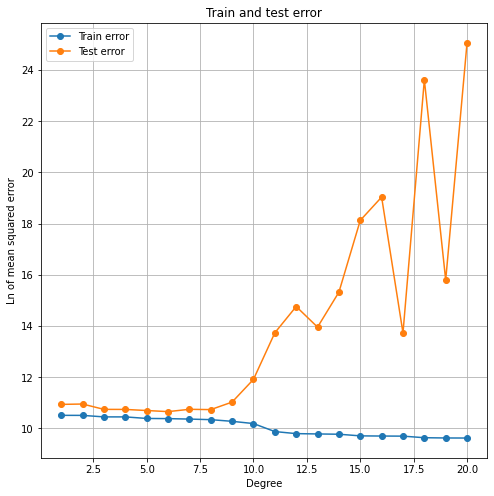

In [14]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
degrees = list(range(1, 21))

mse_train_l, mse_test_l = [], []

for i in degrees:
    poly_reg = PolynomialFeatures(degree=i).fit(x_train)
    x_train_transf = poly_reg.transform(x_train)
    x_test_transf = poly_reg.transform(x_test)
    
    lr = LinearRegression()
    lr.fit(x_train_transf, y_train)

    mse_train = np.log(mean_squared_error(y_train, lr.predict(x_train_transf)))
    mse_test = np.log(mean_squared_error(y_test, lr.predict(x_test_transf)))

    mse_train_l.append(mse_train)
    mse_test_l.append(mse_test)
    

plt.figure(figsize=(8, 8))
plt.title('Train and test error')
plt.plot(degrees, mse_train_l, '-o', label='Train error')
plt.plot(degrees, mse_test_l, '-o', label='Test error')
plt.xlabel('Degree')
plt.ylabel('Ln of mean squared error')
plt.grid()
plt.legend()

plt.show();

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

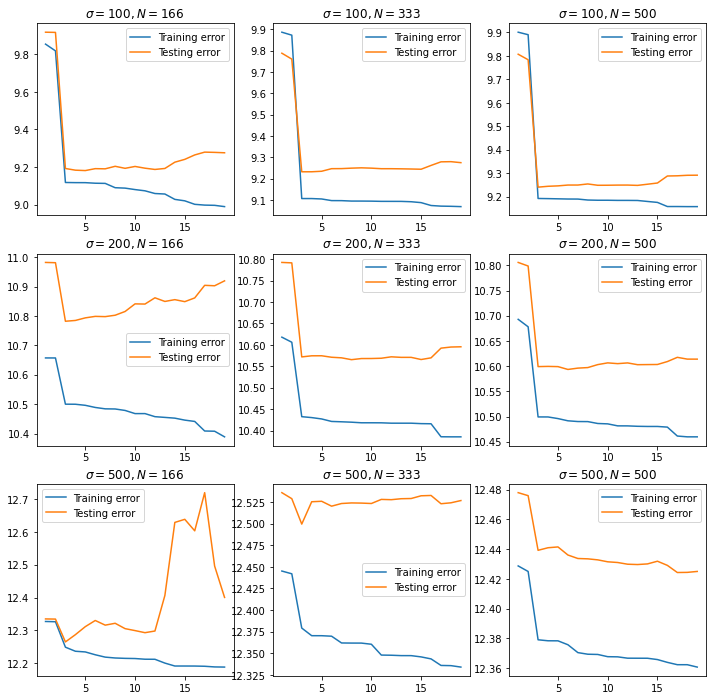

In [15]:
# Vaš kôd ovdje

X1 = make_instances(-5, 5, 1000)
np.random.shuffle(X1)

X1_train, X1_test = X1[:500], X1[500:]
X2_train, X2_test = X1_train[:], X1_test[:]
X3_train, X3_test = X1_train[:], X1_test[:]

y1_train, y1_test = make_labels(X1_train, f, noise=100), make_labels(X1_test, f, noise=100)
y2_train, y2_test = make_labels(X2_train, f, noise=200), make_labels(X2_test, f, noise=200)
y3_train, y3_test = make_labels(X3_train, f, noise=500), make_labels(X3_test, f, noise=500)

def split(X, y):
    indexes1 = np.random.choice(X.shape[0], size=int(X.shape[0]/3), replace=False)
    indexes2 = np.random.choice(X.shape[0], size=int(2*X.shape[0]/3), replace=False)
    return X[indexes1], X[indexes2], X, y[indexes1], y[indexes2], y 

X1_train_third, X1_train_2third, X1_train_whole, y1_train_third, y1_train_2third, y1_train_whole = split(X1_train, y1_train)
X2_train_third, X2_train_2third, X2_train_whole, y2_train_third, y2_train_2third, y2_train_whole = split(X2_train, y2_train)
X3_train_third, X3_train_2third, X3_train_whole, y3_train_third, y3_train_2third, y3_train_whole = split(X3_train, y3_train)

X1_test_third, X1_test_2third, X1_test_whole, y1_test_third, y1_test_2third, y1_test_whole = split(X1_test, y1_test)
X2_test_third, X2_test_2third, X2_test_whole, y2_test_third, y2_test_2third, y2_test_whole = split(X2_test, y2_test)
X3_test_third, X3_test_2third, X3_test_whole, y3_test_third, y3_test_2third, y3_test_whole = split(X3_test, y3_test)

x1_train = [X1_train_third, X1_train_2third, X1_train_whole]
y1_train = [y1_train_third, y1_train_2third, y1_train_whole]
x1_test = [X1_test_third, X1_test_2third, X1_test_whole]
y1_test = [y1_test_third, y1_test_2third, y1_test_whole]

x2_train = [X2_train_third, X2_train_2third, X2_train_whole]
y2_train = [y2_train_third, y2_train_2third, y2_train_whole]
x2_test = [X2_test_third, X2_test_2third, X2_test_whole]
y2_test = [y2_test_third, y2_test_2third, y2_test_whole]

x3_train = [X3_train_third, X3_train_2third, X3_train_whole]
y3_train = [y3_train_third, y3_train_2third, y3_train_whole]
x3_test = [X3_test_third, X3_test_2third, X3_test_whole]
y3_test = [y3_test_third, y3_test_2third, y3_test_whole]

x_train_l = [x1_train, x2_train, x3_train]
x_test_l = [x1_test, x2_test, x3_test]
y_train_l = [y1_train, y2_train, y3_train]
y_test_l = [y1_test, y2_test, y3_test]

fig, axs = plt.subplots(3, 3, figsize=(12, 12))

for i in range(3):
    for j in range(3):
    
        x_train_curr = x_train_l[i][j]
        x_test_curr = x_test_l[i][j]
        y_train_curr = y_train_l[i][j]
        y_test_curr = y_test_l[i][j]

        d = {}

        for k in range(1, 20):

            pf = PolynomialFeatures(degree=k)
            x_train_k = pf.fit_transform(x_train_curr)

            lr = LinearRegression()
            lr.fit(x_train_k, y_train_curr)
            
            x_test_k = pf.transform(x_test_curr)

            mse_train = np.log(mean_squared_error(lr.predict(x_train_k), y_train_curr))
            mse_test = np.log(mean_squared_error(lr.predict(x_test_k), y_test_curr))

            d[k] = (mse_train, mse_test)

        axs[i][j].plot(list(d.keys()), [mse1 for mse1, mse2 in d.values()], label='Training error')
        axs[i][j].plot(list(d.keys()), [mse2 for mse1, mse2 in d.values()], label='Testing error')
        axs[i][j].legend()


n = [166, 333, 500]
sigma = [100, 200, 500]
for i in range(3):
    for j in range(3):
        axs[i][j].set_title(f'$ \sigma = {sigma[i]}, N = {n[j]}$')

plt.show()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [16]:
# Vaš kôd ovdje
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

pf = PolynomialFeatures(degree=3).fit(X)
X = pf.transform(X)

lambdas = [0, 1, 10]
w_vectors = []

diagonal = np.ones(shape=X.shape[0]) 
diagonal[0] = 0
I = np.diag(diagonal)

for i, l in enumerate(lambdas):
    w = linalg.inv(X.T.dot(X) + l*I).dot(X.T.dot(y))
    w_vectors.append(w)

for i, w in enumerate(w_vectors):
    print(f'lambda: {lambdas[i]},    w:{w}')

lambda: 0,    w:[ 4.         -5.91666667  3.375      -0.45833333]
lambda: 1,    w:[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
lambda: 10,    w:[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [17]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

w_vectors = []
for i in lambdas:
    r = Ridge(alpha=i)
    r.fit(X, y)
    print('coef_: ', r.coef_,', intercept_: ', r.intercept_)



coef_:  [ 0.         -5.91666667  3.375      -0.45833333] , intercept_:  4.000000000000022
coef_:  [ 0.         -0.69079365 -0.2831746   0.1445805 ] , intercept_:  3.0569614512471652
coef_:  [ 0.         -0.15897295 -0.13423067  0.0815601 ] , intercept_:  2.4944418431229725


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

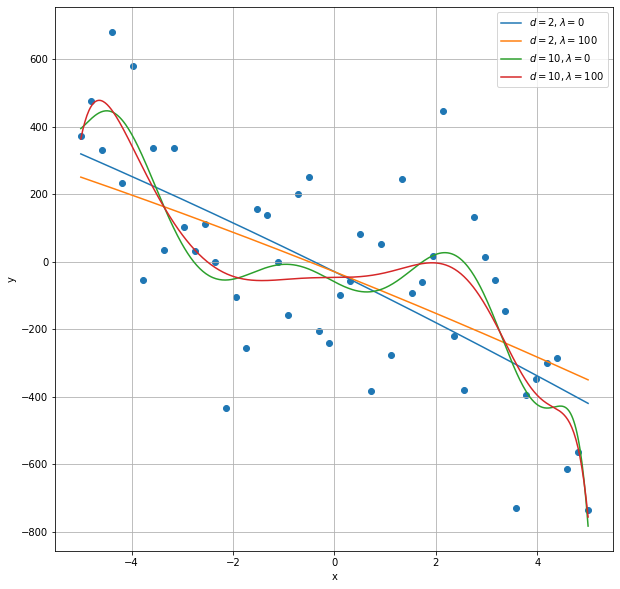

In [18]:
# Vaš kôd ovdje

X = make_instances(-5, 5, 50)
y = make_labels(X, f, noise=200)
model_params = [(2, 0), (2, 100), (10, 0), (10, 100)]

x_values = np.linspace(-5, 5, 500).reshape(-1, 1)

plt.figure(figsize=(10, 10))

for params in model_params:
    pf = PolynomialFeatures(degree=params[0])
    X_ = pf.fit_transform(X)

    r = Ridge(alpha=params[1])
    r.fit(X_, y)

    plt.plot(
        x_values, 
        r.predict(pf.transform(x_values)),
        label=f'$d = {params[0]}, \lambda = {params[1]}$'
    )

plt.scatter(X, y)
plt.grid()
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show();

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


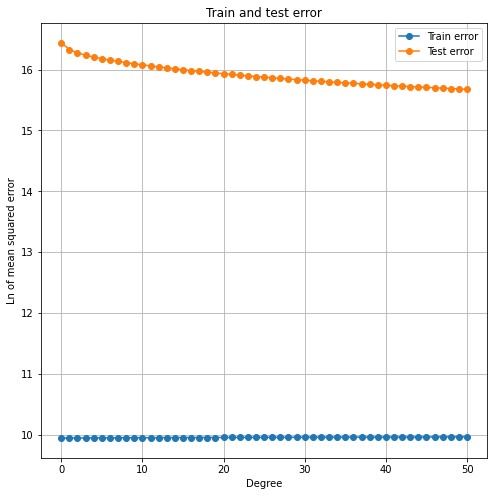

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

pf = PolynomialFeatures(degree=10)

x_train = pf.fit_transform(x_train)
x_test = pf.transform(x_test)

mse_train, mse_test = [], []
lambdas = list(range(51))

for i in lambdas:
    r = Ridge(alpha=i)
    r.fit(x_train, y_train)

    mse_train.append(np.log(mean_squared_error(y_train, r.predict(x_train))))
    mse_test.append(np.log(mean_squared_error(y_test, r.predict(x_test))))

plt.figure(figsize=(8, 8))
plt.plot(lambdas, mse_train, 'o-', label='Train error')
plt.plot(lambdas, mse_test, 'o-', label='Test error')
plt.grid()
plt.xlabel('Degree')
plt.ylabel('Ln of mean squared error')
plt.title('Train and test error')
plt.legend()

plt.show();

## Dodatni zadatci

Zadatci u nastavku (označeni zvjezdicom) nisu dio obaveznog dijela laboratorijske vježbe, niti nose bonus bodove. Dakle, nije ih potrebno riješiti kako biste ostvarili 100% bodova na ovoj laboratorijskoj vježbi. Međutim, preporučamo vam da ih pokušate riješiti i na terminu predaje prodiskutirate svoja rješenja s asistentima.

### *5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [20]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

In [21]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

In [22]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

### *6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [23]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

In [24]:
# Vaš kôd ovdje

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [25]:
# Vaš kôd ovdje

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [26]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### *7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [27]:
# Vaš kôd ovdje

Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [28]:
# Vaš kôd ovdje

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [29]:
# Vaš kôd ovdje

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.